# 확률변수로서의 모델 파라미터

In [1]:
import numpy as np
import matplotlib.pyplot as plt

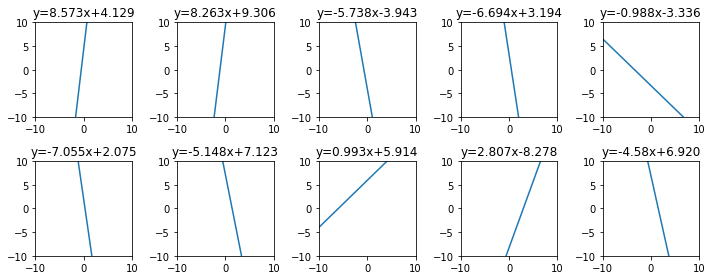

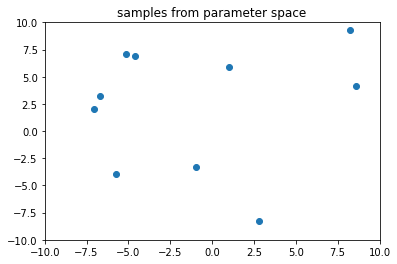

In [6]:
parameter_points=[]
flg1, axes1 = plt.subplots(2,5,figsize=(10,4))

for ax in axes1.flatten():
    #np.random.uniform : 정해진 구간에서 수를 무작위로 추출하여 반환합니다.
    a, b = np.random.uniform(-10.,10,size=2)
    a = round(a,3)
    b = round(b,3)
    parameter_points.append((a,b))
    
    x = np.linspace(-10,10,50)
    y=a*x+b
    ax.plot(x,y)
    
    ax.set_title('y='+str(a)+'x'+'{0:+.03f}'.format(b)) #format(b)를 {}안에 {}내부내용형식으로 
    ax.set_xlim(-10,10)
    ax.set_ylim(-10,10)

plt.tight_layout()

px, py = np.split(np.array(parameter_points), 2, axis=1)
fig2 = plt.figure()
axes2 = plt.gca()

axes2.set_title('samples from parameter space')
axes2.set_xlim(-10, 10)
axes2.set_ylim(-10, 10)

plt.scatter(px, py)
plt.show()

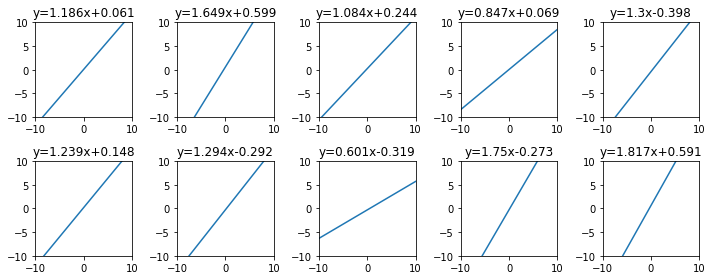

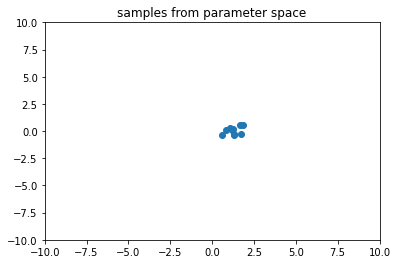

In [9]:
parameter_points = []
fig, axes1 = plt.subplots(2, 5, figsize=(10, 4))

for ax in axes1.flatten():
    # np.random.normal: 정규분포를 따르는 확률 변수의 랜덤한 값을 반환합니다.
    a, b = np.random.normal(loc=[1, 0], scale=0.5) # 평균이 (1,0) 표준편차가 0.5인 정규분포
    a = round(a, 3)
    b = round(b, 3)
    parameter_points.append((a, b))

    x = np.linspace(-10, 10, 50)
    y = a*x + b
    ax.plot(x, y)

    ax.set_title('y='+str(a)+'x'+'{0:+.03f}'.format(b))
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)

plt.tight_layout()

px, py = np.split(np.array(parameter_points), 2, axis=1)
fig2 = plt.figure()
axes2 = plt.gca()

axes2.set_title('samples from parameter space')
axes2.set_xlim(-10, 10)
axes2.set_ylim(-10, 10)

plt.scatter(px, py)
plt.show()

# posterior와 prior, likelihood 사이의 관계

* 모델파라미터를 고정된값이 아닌 불확실성을 가진 확률변수로 봄

![im](./image/joint_probability.png)

In [ ]:
# git clone 된 폴더의 image폴더에 사진 이동후
# ![image(./사진폴더위치) - 상대경로이용

# likelihood 감 잡기

In [11]:
import math
import numpy as np
import matplotlib.pyplot as plt

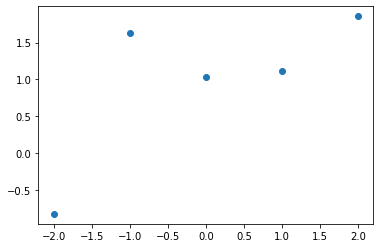

In [12]:
np.random.seed(321)

input_data = np.linspace(-2, 2, 5)
label = input_data + 1 + np.random.normal(0, 1, size=5)

plt.scatter(input_data, label)
plt.show()

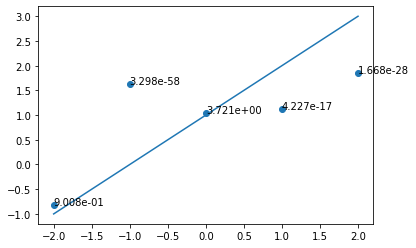

In [13]:
# model: y = ax + b
# a, b 값을 바꾸면서 실행해보세요
#-------------------------------#
a = 1
b = 1
#-------------------------------#

# 모델 예측값
model_output = a*input_data + b
likelihood = []

for x, y, output in zip(input_data, label, model_output):
    likelihood.append(1/(math.sqrt(2*math.pi*0.1*0.1))*math.exp(-pow(y-output,2)/(2*0.1*0.1)))
    
model_x = np.linspace(-2, 2, 50)
model_y = a*model_x + b

fig, ax = plt.subplots()
ax.scatter(input_data, label)
ax.plot(model_x, model_y)

for i, text in enumerate(likelihood):
    ax.annotate('%.3e'%text, (input_data[i], label[i]))

plt.show()